In [12]:
from rsi_backtest import make_extensive_test_ticker, backtest_rsi, make_extensive_test_tickers_list
import pandas as pd
import warnings

from stocks_data import find_stocks_with_high_volume
from tickers import *
from rsi_opportunity_analyzer import *
from stocks_data import get_data_with_adj_close
from position_sizing import *
from rsi_plot import plot_rsi_data
from atr_indicator import calculate_atr
from stop_setting import *

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Ignora FutureWarnings específicos relacionados a yfinance
warnings.filterwarnings("ignore", category=FutureWarning)

Relatório com Oportunidades de Ticker sobrecomprados e sobrevendidos e também ativos com volume acima da média em 1 desvio padrão

In [2]:
interval = "1wk"
ifix_analysis = analyze_rsi_opportunities_from_tickers(IFIX, interval, "2y")
idiv_analysis = analyze_rsi_opportunities_from_tickers(IDIV, interval, "10y", lower_rsi_limit=0.15)
print("____________IFIX_______________")
print_rsi_opportunity_analysis(ifix_analysis)
print(f"IFIX com alto volume {find_stocks_with_high_volume(IFIX, '1d', '1mo', 10)}")
print("____________IDIV_______________")
print_rsi_opportunity_analysis(idiv_analysis)
print(f"IDIV com alto volume {find_stocks_with_high_volume(IDIV, '1d', '1mo', 10)}")

____________IDIV_______________
overbought tickers: ['JBSS3', 'MRFG3', 'PSSA3']
oversold tickers: ['ABCB4', 'CPLE3', 'CPLE6', 'GRND3', 'PETR3', 'PETR4', 'ROMI3', 'TASA4', 'UNIP6']
IDIV com alto volume ['ALUP11', 'EGIE3', 'RANI3', 'KLBN4', 'LAVV3', 'LEVE3', 'PETR3', 'SANB11', 'UNIP6']


In [13]:
interval = "1d"
idiv_analysis = analyze_rsi_opportunities_from_tickers(IDIV, interval, "3y", lower_rsi_limit=0.15)
print("____________IDIV_______________")
print_rsi_opportunity_analysis(idiv_analysis)


____________IDIV_______________
overbought tickers: ['MRFG3']
oversold tickers: ['ABCB4', 'BBAS3', 'CPLE3', 'CPLE6', 'LEVE3', 'PETR3', 'PETR4', 'ROMI3', 'SANB11', 'TASA4']


Estudo de entradas e saídas em relação a um ativo em específico para diferentes alvos

In [18]:
ticker = "grnd3"
period = "3y"
interval = "1d"
use_stop = True
use_upper_threshold = True
use_target = True
min_holding_period = 1
use_moving_stop = True
atr_factor= 1.5

print(f"____________backtest {ticker}_______________")
backtest = backtest_rsi(ticker, 2, period, interval, min_holding_period=min_holding_period, use_stop=use_stop,
                        use_upper_threshold=use_upper_threshold, use_target=use_target, use_moving_stop=use_moving_stop, atr_factor=atr_factor)
print(backtest)

print(f"____________ticker_analysis_results {ticker}_______________")
ticker_analysis_results = make_extensive_test_ticker(ticker, period, interval,
                                                        min_holding_period=min_holding_period,
                                                        use_stop=use_stop, use_upper_threshold=use_upper_threshold,
                                                        use_target=use_target, use_moving_stop=use_moving_stop, atr_factor=atr_factor)
print(ticker_analysis_results)

____________backtest grnd3_______________
    Entry RSI Signal Date Entry Date     Entry      Stop    Target  Exit Date Duration  Gain/Loss %  Result  Initial stop  R multiple
0   42.904505  2021-12-03 2021-12-10  7.629548  7.494837  8.640752 2021-12-14   4 days    -1.765647    Stop      7.123946   -0.266437
1   37.631334  2022-01-07 2022-01-14  7.105260  7.085231  7.644427 2022-01-20   6 days     8.891731  Target      6.835676    2.343539
2   37.763144  2022-03-08 2022-03-15  7.016121  7.319214  7.662249 2022-03-17   2 days    15.738116  Target      6.693057    3.417916
3   46.062370  2022-07-20 2022-07-28  6.403272  6.601008  7.496708 2022-08-22  25 days     3.088043  Target      5.856554    0.361678
4   40.070890  2022-09-30 2022-10-07  6.509718  6.390326  7.041983 2022-10-26  19 days    -2.254168    Stop      6.243586   -0.551380
5   39.539389  2022-10-27 2022-11-03  6.300050  6.486045  6.704690 2022-11-07   4 days     7.541274  Target      6.097730    2.348277
6   39.206658  2022-

Estudo extensivo de todo um mercado para encontrar os melhores indicadores para cada alvo

In [ ]:
period = "3y"
interval = "1d"
use_stop = True
use_upper_threshold = True
use_target = True
min_holding_period = 1
use_moving_stop = True

print(make_extensive_test_tickers_list(IDIV, period, interval, min_holding_period=min_holding_period,
                                        use_stop=use_stop, use_upper_threshold=use_upper_threshold,
                                        use_target=use_target, use_moving_stop=use_moving_stop))

Encontra os limites superior e inferior de RSI para um determinado ativo

limite inferior de RSI para o ticker grnd3: 37.35982769831192
limite superior de RSI para o ticker grnd3: 61.39213710721523
valor atual de RSI para o ticker grnd3: 39.04989500818248


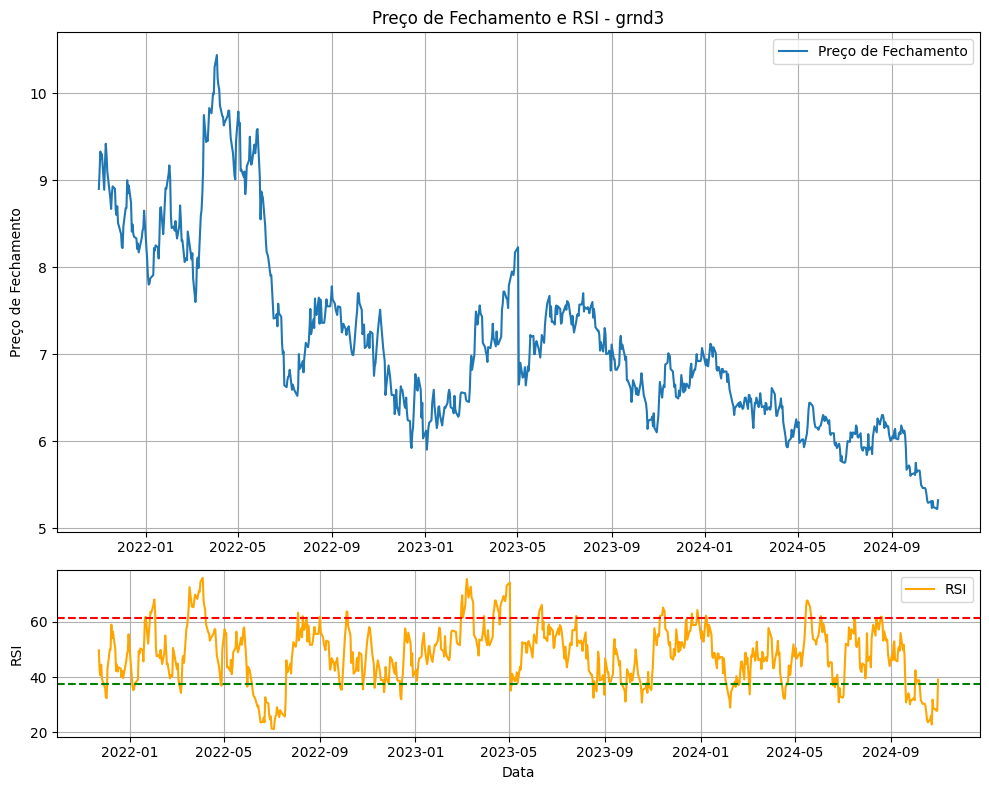

In [15]:
ticker = "grnd3"
period = "3y"
interval = "1d"

low_threshold = 0.15
high_threshold = 0.9

data = get_data_with_adj_close(ticker, interval, period)
rsi = calculate_rsi(data, period=14)
lower_threshold = get_lower_threshold_rsi(rsi, low_threshold)
upper_threshold = get_upper_threshold_rsi(rsi, high_threshold)

print(f"limite inferior de RSI para o ticker {ticker}: {lower_threshold}")
print(f"limite superior de RSI para o ticker {ticker}: {upper_threshold}")
print(f"valor atual de RSI para o ticker {ticker}: {rsi.iloc[-1]}")
plot_rsi_data(data, rsi, ticker, upper_threshold, lower_threshold)
# print(data['RSI'])

Position sizing

In [8]:
from position_sizing import get_unit_risk

entry = 24.04
stop_entry_weekly = 23.17
max_loss = 400

unit_risk = get_unit_risk(entry, stop_entry_weekly)
number_stocks = get_number_stocks_based_on_risk(unit_risk, max_loss)

print(f"Para um risco unitário de {unit_risk}, risco máximo de {max_loss}, comprar {number_stocks} unidades da ação")

Para um risco unitário de 0.8699999999999974, risco máximo de 400, comprar 460 unidades da ação


In [9]:
ticker = "BEEF3"
period = "10y"
interval = "1wk"
entry = 7.22
data = get_data_with_adj_close(ticker, interval, period)
factor = 1
atr = data['ATR'][-1]
stop_entry_weekly = get_stop_atr(entry, atr, factor)

print(f"stop de entrada {stop_entry_weekly} ajustado, pela ATR para entrada {entry}, atr {atr}, fator {factor}")


KeyError: 'ATR'

In [ ]:
ticker = "AGRO3"
period = "10y"
interval = "1wk"
factor = 1.3
atr_periods = 20
current_stop = 23.17
data = get_data_with_adj_close(ticker, interval, period)

print(f"stop: {current_stop_finder(data, current_stop, factor, atr_periods=atr_periods)}")